### Gonzalo Carretero Ursúa
### ENERO/2021


## Práctica: Examen 19-20

## 1. Inicializar Contexto Spark

In [14]:
# Inicio el contexto spark
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

from pyspark.sql import SparkSession

# Inicio contesto Spark.SQL 
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)


from pyspark.sql import Row

In [15]:
# Spark por defecto utiliza 1GB, lo cambiamos a 5
from pyspark import SparkConf
conf = SparkConf()
conf.set("spark.driver.memory", "5g")

spark = SparkSession.builder \
            .config(conf=conf) \
            .master("local[*]") \
            .getOrCreate()

## 1.2 Carga y parseado

In [3]:
indicadores_deuda = "indicadores_deuda.csv" 
indicadores_deuda = sc.textFile(indicadores_deuda)
indicadores_deuda = indicadores_deuda.map(lambda x: x.split(","))
indicadores_deuda.take(1)

[['country_name',
  'country_code',
  'DT.AMT.BLAT.CD',
  'DT.AMT.DLXF.CD',
  'DT.AMT.DPNG.CD',
  'DT.AMT.MLAT.CD',
  'DT.AMT.OFFT.CD',
  'DT.AMT.PBND.CD',
  'DT.AMT.PCBK.CD',
  'DT.AMT.PROP.CD',
  'DT.AMT.PRVT.CD',
  'DT.DIS.BLAT.CD',
  'DT.DIS.DLXF.CD',
  'DT.DIS.MLAT.CD',
  'DT.DIS.OFFT.CD',
  'DT.DIS.PCBK.CD',
  'DT.DIS.PROP.CD',
  'DT.DIS.PRVT.CD',
  'DT.INT.BLAT.CD',
  'DT.INT.DLXF.CD',
  'DT.INT.DPNG.CD',
  'DT.INT.MLAT.CD',
  'DT.INT.OFFT.CD',
  'DT.INT.PBND.CD',
  'DT.INT.PCBK.CD',
  'DT.INT.PROP.CD',
  'DT.INT.PRVT.CD']]

In [4]:
print(indicadores_deuda.count())

125


In [5]:
# Segundo parseado

In [65]:
new = "indicadores_deuda.csv" 
new = sc.textFile(new)
new.take(2)

['country_name,country_code,DT.AMT.BLAT.CD,DT.AMT.DLXF.CD,DT.AMT.DPNG.CD,DT.AMT.MLAT.CD,DT.AMT.OFFT.CD,DT.AMT.PBND.CD,DT.AMT.PCBK.CD,DT.AMT.PROP.CD,DT.AMT.PRVT.CD,DT.DIS.BLAT.CD,DT.DIS.DLXF.CD,DT.DIS.MLAT.CD,DT.DIS.OFFT.CD,DT.DIS.PCBK.CD,DT.DIS.PROP.CD,DT.DIS.PRVT.CD,DT.INT.BLAT.CD,DT.INT.DLXF.CD,DT.INT.DPNG.CD,DT.INT.MLAT.CD,DT.INT.OFFT.CD,DT.INT.PBND.CD,DT.INT.PCBK.CD,DT.INT.PROP.CD,DT.INT.PRVT.CD',
 'Afghanistan,AFG,61739336.9,100847181.9,,39107845,100847181.9,,,,,49114729.4,72894453.7,23779724.3,72894453.7,,,,39903620.1,53239440.1,,13335820,53239440.1,,,,']

In [66]:
header = new.take(1)[0]
raw_desarrollo = new \
    .filter(lambda line: line!=header)

In [67]:
new = raw_desarrollo.map(lambda x: x.split(","))
new.take(1)

[['Afghanistan',
  'AFG',
  '61739336.9',
  '100847181.9',
  '',
  '39107845',
  '100847181.9',
  '',
  '',
  '',
  '',
  '49114729.4',
  '72894453.7',
  '23779724.3',
  '72894453.7',
  '',
  '',
  '',
  '39903620.1',
  '53239440.1',
  '',
  '13335820',
  '53239440.1',
  '',
  '',
  '',
  '']]

## Dataset 2

In [228]:
indicadores = "indicadores_desarrollo.csv" 
indicadores = sc.textFile(indicadores)
indicadores = indicadores.map(lambda x: x.split(","))
indicadores.take(1)

[['country_name',
  'country_code',
  'anho',
  'GC.DOD.TOTL.CN',
  'GC.DOD.TOTL.GD.ZS',
  'SP.DYN.CBRT.IN']]

In [18]:
print(indicadores.count())

135


In [19]:
# Segundo parseado

In [30]:
new2 = "indicadores_desarrollo.csv" 
new2 = sc.textFile(new2)
new2.take(2)

['country_name,country_code,anho,GC.DOD.TOTL.CN,GC.DOD.TOTL.GD.ZS,SP.DYN.CBRT.IN',
 'Albania,ALB,2014 [YR2014],1023040800000,73.3202469198429,12.259']

In [31]:
header = new2.take(1)[0]
raw2_desarrollo = new2 \
    .filter(lambda line: line!=header)

In [32]:
new2 = raw2_desarrollo.map(lambda x: x.split(","))
new2.take(1)

[['Albania',
  'ALB',
  '2014 [YR2014]',
  '1023040800000',
  '73.3202469198429',
  '12.259']]

In [33]:
def parse_year(x):
    sep = x.split()
    return (sep[0])

In [34]:
new2 = new2.map(lambda x: (x[0], x[1], parse_year(x[2]), x[3], x[4], x[5]))
new2.take(1)

[('Albania', 'ALB', '2014', '1023040800000', '73.3202469198429', '12.259')]

## 2. Número de países distintos en cada dataset. ¿Coinciden?

In [30]:
new.map(lambda x: x[0]).distinct().count()

124

In [793]:
new.map(lambda x: x[0]).distinct().collect()

['Albania',
 'Algeria',
 'Angola',
 'Belize',
 'Bhutan',
 'Botswana',
 'Brazil',
 'Cabo Verde',
 'Cambodia',
 'China',
 'Congo',
 'Costa Rica',
 'Ecuador',
 'El Salvador',
 'Eritrea',
 'Ethiopia',
 'Fiji',
 'Gabon',
 'Ghana',
 'Guatemala',
 'Guinea-Bissau',
 'Honduras',
 'India',
 'Iran',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kyrgyz Republic',
 'Least developed countries: UN classification',
 'Lebanon',
 'Liberia',
 'Macedonia',
 'Malawi',
 'Maldives',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Montenegro',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Nigeria',
 'Pakistan',
 'Paraguay',
 'Peru',
 'Philippines',
 'Russian Federation',
 'Solomon Islands',
 'Somalia',
 'South Africa',
 'St. Vincent and the Grenadines',
 'Syrian Arab Republic',
 'Tanzania',
 'Thailand',
 'Timor-Leste',
 'Togo',
 'Tunisia',
 'Turkmenistan',
 'Ukraine',
 'Uzbekistan',
 'Venezuela',
 'Vietnam',
 'Zambia',
 'Afghanistan',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Benin',
 'Bolivia',
 'Bosnia and Herzego

In [ ]:
# Segundo Dataset

In [794]:
new2.map(lambda x: x[0]).distinct().count()

52

In [795]:
new2.map(lambda x: x[0]).distinct().collect()

['Albania',
 'Australia',
 'Barbados',
 'Belize',
 'Bhutan',
 'Botswana',
 'Brazil',
 'El Salvador',
 'Guatemala',
 'Hungary',
 'Ireland',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Malawi',
 'Palau',
 'Peru',
 'Philippines',
 'Russian Federation',
 'Solomon Islands',
 'Switzerland',
 'Thailand',
 'Ukraine',
 'United States',
 'Uruguay',
 'Zambia',
 'country_name',
 'Bahamas',
 'Belarus',
 'Colombia',
 'Georgia',
 'Indonesia',
 'Jamaica',
 'Japan',
 'Jordan',
 'Korea Rep',
 'Malaysia',
 'Micronesia',
 'Moldova',
 'Namibia',
 'New Zealand',
 'Papua New Guinea',
 'San Marino',
 'Seychelles',
 'Singapore',
 'Spain',
 'Sri Lanka',
 'St Kitts and Nevis',
 'St Lucia',
 'St Vincent and the Grenadines',
 'Tonga',
 'Turkey',
 'United Kingdom']

## 3. Total de deuda contraida por cada país (total amount of debt (in USD) DT.AMT.MLAT.CD

In [235]:
indicadores_deuda.map(lambda x: (x[0], x[5])).collect()

[('country_name', 'DT.AMT.MLAT.CD'),
 ('Afghanistan', '39107845'),
 ('Albania', '182197616.7'),
 ('Algeria', '0'),
 ('Angola', '124688691.9'),
 ('Armenia', '94331207.1'),
 ('Azerbaijan', '513623656.5'),
 ('Bangladesh', '1039564682.7'),
 ('Belarus', '595438826'),
 ('Belize', '29683326.5'),
 ('Benin', '91631639.5'),
 ('Bhutan', '17390420.5'),
 ('Bolivia', '357721211.5'),
 ('Bosnia and Herzegovina', '290170946.5'),
 ('Botswana', '125652344.5'),
 ('Brazil', '2514318741.6'),
 ('Bulgaria', '228993019.8'),
 ('Burkina Faso', '119510893'),
 ('Burundi', '16115111.8'),
 ('Cabo Verde', '39970124.9'),
 ('Cambodia', '72307001.8'),
 ('Cameroon', '152095968.1'),
 ('Central African Republic', '2241813.8'),
 ('Chad', '95738709.5'),
 ('China', '2615723714.1'),
 ('Colombia', '1100907553.6'),
 ('Comoros', '2182053.1'),
 ('Congo', '143105462'),
 ('Congo', '18114469'),
 ('Costa Rica', '272808260.7'),
 ('Cote dIvoire', '84629406.5'),
 ('Djibouti', '34254909.2'),
 ('Dominica', '11130355.8'),
 ('Dominican Repub

## 4. Media de los indicadores de deuda (tabla uno): DT.AMT.BLAT.CD, DT.DIS.BLAT.CD, DT.INT.BLAT.CD

In [57]:
import statistics as stats 

In [68]:
cuatro = new.map(lambda x: (x[0],x[2]))
cuatro.take(5)

[('Afghanistan', '61739336.9'),
 ('Albania', '54250280.6'),
 ('Algeria', '95188724.6'),
 ('Angola', '8473824016.3'),
 ('Armenia', '68968314.7')]

In [55]:
cuatrobueno = cuatro.filter(lambda x: not 'Timor-Leste'  in x[0])\
                    .filter(lambda x: not 'South Africa'  in x[0])\
                    .map(lambda x: (float(x[1]))).mean()

print("La media de la columna DT.AMT.BLAT.CD es" ,format(cuatrobueno))

La media de la columna DT.AMT.BLAT.CD es 712619634.6598358


In [57]:
cuatro2 = new.map(lambda x: (x[0],x[11]))
cuatro2.collect()

[('Afghanistan', '49114729.4'),
 ('Albania', '76050616.1'),
 ('Algeria', '10320772.2'),
 ('Angola', '8838256901.1'),
 ('Armenia', '174269846.7'),
 ('Azerbaijan', '84748079.6'),
 ('Bangladesh', '6141785637.5'),
 ('Belarus', '2265336386.7'),
 ('Belize', '3581448.7'),
 ('Benin', '334698287.3'),
 ('Bhutan', '95819437.4'),
 ('Bolivia', '554128686.3'),
 ('Bosnia and Herzegovina', '114375048.3'),
 ('Botswana', '1316332.2'),
 ('Brazil', '1179125278.8'),
 ('Bulgaria', ''),
 ('Burkina Faso', '90915960.2'),
 ('Burundi', '42339024.4'),
 ('Cabo Verde', '37178444.8'),
 ('Cambodia', '476683829.4'),
 ('Cameroon', '17090544247.5'),
 ('Central African Republic', '19477551.6'),
 ('Chad', '27987660.9'),
 ('China', ''),
 ('Colombia', '110671664.3'),
 ('Comoros', '8492726.4'),
 ('Congo', '103263632'),
 ('Congo', '150347308.2'),
 ('Costa Rica', '105969275.9'),
 ('Cote dIvoire', '526901028'),
 ('Djibouti', '85687012.1'),
 ('Dominica', '1092575'),
 ('Dominican Republic', '311336450.8'),
 ('Ecuador', '415778474

In [70]:
cuatrobueno2 = cuatro2.filter(lambda x: not 'Bulgaria'  in x[0])\
                    .filter(lambda x: not 'China'  in x[0])\
                    .filter(lambda x: not 'Guinea-Bissau'  in x[0])\
                    .filter(lambda x: not 'Iran'  in x[0])\
                    .filter(lambda x: not 'Solomon Islands'  in x[0])\
                    .filter(lambda x: not 'Somalia'  in x[0])\
                    .filter(lambda x: not 'South Africa'  in x[0])\
                    .filter(lambda x: not 'Tonga'  in x[0])\
                    .filter(lambda x: not 'Turkmenistan'  in x[0])\
                    .filter(lambda x: not 'South Africa'  in x[0])\
                    .filter(lambda x: not 'Russian Federation'  in x[0])\
                    .filter(lambda x: not 'Tonga'  in x[0])\
                    .filter(lambda x: not 'Ukraine'  in x[0])\
                    .map(lambda x: (float(x[1]))).mean()

print("La media de la columna DT.DIS.BLAT.CD es" ,format(cuatrobueno2))

La media de la columna DT.DIS.BLAT.CD es 1223139290.3982308


In [71]:
cuatro3 = new.map(lambda x: (x[0],x[18]))
cuatro3.collect()

[('Afghanistan', '39903620.1'),
 ('Albania', '13847333.6'),
 ('Algeria', '7680627.6'),
 ('Angola', '1005053965.1'),
 ('Armenia', '24094832'),
 ('Azerbaijan', '10085950'),
 ('Bangladesh', '309079773.4'),
 ('Belarus', '630234914.9'),
 ('Belize', '3455608.4'),
 ('Benin', '13208408.6'),
 ('Bhutan', '184064524.8'),
 ('Bolivia', '32609012.4'),
 ('Bosnia and Herzegovina', '12605397.7'),
 ('Botswana', '884447.5'),
 ('Brazil', '333237826.9'),
 ('Bulgaria', '6012379.2'),
 ('Burkina Faso', '7382485.5'),
 ('Burundi', '520425.7'),
 ('Cabo Verde', '4216236.3'),
 ('Cambodia', '63836683.2'),
 ('Cameroon', '120877158.5'),
 ('Central African Republic', '860961'),
 ('Chad', '11882770.9'),
 ('China', '514898407.1'),
 ('Colombia', '122715407.2'),
 ('Comoros', '782831.5'),
 ('Congo', '62260653.1'),
 ('Congo', '19522109.8'),
 ('Costa Rica', '10709783.4'),
 ('Cote dIvoire', '73124399.9'),
 ('Djibouti', '44878881.9'),
 ('Dominica', '1693891.5'),
 ('Dominican Republic', '43812226.9'),
 ('Ecuador', '424453624.8'

In [72]:
cuatrobueno3 = cuatro3.filter(lambda x: not 'South Africa'  in x[0])\
                    .filter(lambda x: not 'Timor-Leste'  in x[0])\
                    .map(lambda x: (float(x[1]))).mean()

print("La media de la columna DT.INT.BLAT.CD es" ,format(cuatrobueno3))

La media de la columna DT.INT.BLAT.CD es 164093285.60901642


## 5. Los 20 países con DT.AMT.DLXF.CD más alto

In [93]:
cinco = new.map(lambda x: (x[0], (float(x[3]))))\
            .sortBy(lambda x: x[1], ascending = False)\
            .takeOrdered(20, lambda x: len(x))
cinco

[('China', 96218620835.7),
 ('Brazil', 90041840304.1),
 ('Russian Federation', 66589761833.5),
 ('Turkey', 51555031005.8),
 ('South Asia', 48756295898.2),
 ('India', 31923507000.8),
 ('Indonesia', 30916112653.8),
 ('Kazakhstan', 27482093686.4),
 ('Mexico', 25218503927.0),
 ('Least developed countries: UN classification', 25197029299.4),
 ('IDA only', 20483289208.0),
 ('Romania', 14013783350.4),
 ('Colombia', 11985674438.7),
 ('Angola', 11067045628.1),
 ('Cameroon', 10404814960.2),
 ('Venezuela', 9878659207.2),
 ('Egypt', 9692114176.9),
 ('Lebanon', 9506919669.6),
 ('South Africa', 9474257551.9),
 ('Vietnam', 8873505909.2)]

## 6. País con los datos informados todos los años

In [902]:
new2.filter(lambda x: "2017" in x[2]).collect()

[('Malawi', 'MWI', '2017', '2239858619962.69', '48.659564238322', '34.593')]

In [907]:
data = new2.filter(lambda x: "2017" in x[2]).map(lambda x: (x[0])).collect()
print("El país con datos de todos los años es" ,format(data))

El país con datos de todos los años es ['Malawi']


## 7. Media anual de los distintos indicadores de desarrollo

In [786]:
indicadores.take(1)

[['country_name',
  'country_code',
  'anho',
  'GC.DOD.TOTL.CN',
  'GC.DOD.TOTL.GD.ZS',
  'SP.DYN.CBRT.IN']]

In [80]:
siete = new2.map(lambda x: (x[2], (float(x[3])), (float(x[4])), (float(x[5]))))
siete.take(5)

[('2014', 1023040800000.0, 73.3202469198429, 12.259),
 ('2015', 1145500940000.0, 79.8644448747259, 12.197),
 ('2016', 1188814490000.0, 80.7355748396923, 12.08),
 ('2014', 674700000.0, 0.042207528166503, 13.2),
 ('2015', 762718000.0, 0.0469480198522591, 12.9)]

In [610]:
# Este apartado no sirve para nada en el ejercicio, simplemente lo utilizo yo para hacer alguna comprobación
siete.groupBy(lambda x: x[0]).mapValues(list).collect() 

[('2014',
  [('2014', 1023040800000.0, 73.3202469198429, 12.259),
   ('2014', 674700000.0, 0.042207528166503, 13.2),
   ('2014', 5158420000.0, 47.2672793747079, 14.34),
   ('2014', 12175704025.0, 129.629591844133, 10.916),
   ('2014', 19781184418.0, 24.5487262642116, 12.5),
   ('2014', 2609974000.0, 78.4811739351877, 22.067),
   ('2014', 108370000000.0, 89.8206297688459, 17.965),
   ('2014', 25447260000.0, 17.4453597097219, 26.87),
   ('2014', 3378218222290.28, 58.4572609903155, 14.624),
   ('2014', 607904432000000.0, 79.683056954816, 15.725),
   ('2014', 11486057983.75, 50.8390120114637, 18.881),
   ('2014', 10313000000.0, 33.1350946694041, 14.165),
   ('2014', 105781000000.0, 23.2970727082014, 25.992),
   ('2014', 31995288000000.0, 97.8622513198668, 9.5),
   ('2014', 2898383597986100.0, 27.4216121994064, 19.537),
   ('2014', 236301000000.0, 121.293079734391, 14.4),
   ('2014', 2041693750000.0, 132.427374548077, 16.814),
   ('2014', 999119100000000.0, 194.42805268197, 8.0),
   ('2014'

In [689]:
bb = siete.map(lambda x: (int(x[0]), x[1]))

In [690]:
bb2 = bb.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
bb2.collect()

[(2014, 5172137936647662.0),
 (2016, 6193739040374572.0),
 (2015, 5800273772299710.0),
 (2017, 2239858619962.69)]

In [691]:
bb6 = bb.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
bb6.collect()

[(2014, 50), (2016, 39), (2015, 44), (2017, 1)]

In [692]:
media = bb2.join(bb6).map(lambda x:(x[0],(x[1][0]/x[1][1])))

In [693]:
media.collect()

[(2014, 103442758732953.23),
 (2016, 158813821548065.94),
 (2015, 131824403915902.5),
 (2017, 2239858619962.69)]

In [ ]:
# Segundo elemento

In [713]:
yy = siete.map(lambda x: (int(x[0]), x[2]))
yy2 = yy.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
yy6 = yy.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media2 = yy2.join(yy6).map(lambda x:(x[0],(x[1][0]/x[1][1])))
media2.collect()

[(2014, 56.843914344384395),
 (2016, 58.796949624008356),
 (2015, 58.36559834488034),
 (2017, 48.659564238322)]

In [ ]:
# Tercer elemento

In [82]:
zz = siete.map(lambda x: (int(x[0]), x[3]))
zz2 = zz.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
zz6 = zz.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media3 = zz2.join(zz6).map(lambda x:(x[0],(x[1][0]/x[1][1])))
media3.collect()

[(2014, 17.582620000000006),
 (2016, 16.144333333333332),
 (2015, 16.798477272727272),
 (2017, 34.593)]

## 8. Podrías decirme el total de deuda acumulada DT.AMT.MLAT.CD por los 10 países con un valor en media menor de SP.DYN.CBRT.IN

In [35]:
ocho = new2.map(lambda x: (x[0], float(x[5])))
suma = ocho.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo = ocho.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
mediaocho = suma.join(conteo).map(lambda x:(x[0],(x[1][0]/x[1][1])))
mediaocho.take(2)

[('Albania', 12.178666666666667), ('Australia', 13.0)]

In [36]:
eight = new.map(lambda x: (x[0], x[5]))
eight.take(5)

[('country_name', 'DT.AMT.MLAT.CD'),
 ('Afghanistan', '39107845'),
 ('Albania', '182197616.7'),
 ('Algeria', '0'),
 ('Angola', '124688691.9')]

In [37]:
eight.join(mediaocho).map(lambda x:(x[0], x[1])).collect()

[('Belize', ('29683326.5', 22.067)),
 ('Botswana', ('125652344.5', 26.417666666666666)),
 ('Guatemala', ('339822253.6', 25.628666666666664)),
 ('Russian Federation', ('141669500', 13.166666666666666)),
 ('Ukraine', ('1072472830.3', 10.6)),
 ('Zambia', ('53068964.9', 38.2975)),
 ('Belarus', ('595438826', 12.466666666666667)),
 ('Georgia', ('144062401.5', 14.056)),
 ('Jamaica', ('174427648', 16.63566666666667)),
 ('Jordan', ('270498715.5', 24.305)),
 ('Moldova', ('135842865.5', 10.604333333333335)),
 ('Papua New Guinea', ('78345326', 28.1685)),
 ('Turkey', ('2932698678', 16.717333333333332)),
 ('Albania', ('182197616.7', 12.178666666666667)),
 ('Bhutan', ('17390420.5', 17.791)),
 ('Brazil', ('2514318741.6', 14.467666666666666)),
 ('El Salvador', ('298939687.1', 18.733999999999998)),
 ('Kazakhstan', ('1079948889.7', 22.776666666666667)),
 ('Kyrgyz Republic', ('75278037.2', 27.03333333333333)),
 ('Malawi', ('35659831.4', 35.556)),
 ('Peru', ('553634090', 18.564666666666668)),
 ('Philippine

In [38]:
# El join con Rdd no me ha captado bien las keys, utilizaré los Rdds creados previamente y hago el join con 
# el contexto Spark SQL

In [39]:
data = mediaocho.map(lambda x: Row(
Country=str(x[0]),
SP_DYN_CBRT_IN=x[1]))

In [40]:
ochosql = sqlContext.createDataFrame(data)
ochosql.show()

+------------------+------------------+
|           Country|    SP_DYN_CBRT_IN|
+------------------+------------------+
|           Albania|12.178666666666667|
|         Australia|              13.0|
|          Barbados|            10.861|
|            Belize|            22.067|
|            Bhutan|            17.791|
|          Botswana|26.417666666666666|
|            Brazil|14.467666666666666|
|       El Salvador|18.733999999999998|
|         Guatemala|25.628666666666664|
|           Hungary| 9.533333333333333|
|           Ireland|              13.9|
|        Kazakhstan|22.776666666666667|
|   Kyrgyz Republic| 27.03333333333333|
|            Malawi|            35.556|
|             Palau|13.133333333333333|
|              Peru|18.564666666666668|
|       Philippines|            22.935|
|Russian Federation|13.166666666666666|
|   Solomon Islands|33.525666666666666|
|       Switzerland|10.466666666666667|
+------------------+------------------+
only showing top 20 rows



In [134]:
data2 = eight.map(lambda x: Row(
Country=str(x[0]),
Deuda=x[1]))
deudasql = sqlContext.createDataFrame(data2)
deudasql.show()

+--------------------+--------------+
|             Country|         Deuda|
+--------------------+--------------+
|        country_name|DT.AMT.MLAT.CD|
|         Afghanistan|      39107845|
|             Albania|   182197616.7|
|             Algeria|             0|
|              Angola|   124688691.9|
|             Armenia|    94331207.1|
|          Azerbaijan|   513623656.5|
|          Bangladesh|  1039564682.7|
|             Belarus|     595438826|
|              Belize|    29683326.5|
|               Benin|    91631639.5|
|              Bhutan|    17390420.5|
|             Bolivia|   357721211.5|
|Bosnia and Herzeg...|   290170946.5|
|            Botswana|   125652344.5|
|              Brazil|  2514318741.6|
|            Bulgaria|   228993019.8|
|        Burkina Faso|     119510893|
|             Burundi|    16115111.8|
|          Cabo Verde|    39970124.9|
+--------------------+--------------+
only showing top 20 rows



In [895]:
big = deudasql.join(ochosql, 'Country','left')
bigorder = big.sort('SP_DYN_CBRT_IN')
bigorder.show()

+--------------------+------------+--------------+
|             Country|       Deuda|SP_DYN_CBRT_IN|
+--------------------+------------+--------------+
|             Algeria|           0|          null|
|              Rwanda|  31090382.5|          null|
|            Maldives|  17896143.5|          null|
|            Dominica|  11130355.8|          null|
|              Guyana|  34651806.5|          null|
|Least developed c...|4084275524.2|          null|
|             Senegal| 170437929.1|          null|
|          Cabo Verde|  39970124.9|          null|
|                Chad|  95738709.5|          null|
|            Paraguay| 207662030.9|          null|
|            Djibouti|  34254909.2|          null|
|          South Asia|7851739929.5|          null|
|                Fiji|   9082442.6|          null|
|               Yemen| 220743129.9|          null|
|             Comoros|   2182053.1|          null|
|         Afghanistan|    39107845|          null|
|            Cambodia|  7230700

In [908]:
bigorder.dropna().take(10) # Listado de los países con SP_DYN_CBRT_IN medio menor (que tengamos datos)

[Row(Country='Ukraine', Deuda='1072472830.3', SP_DYN_CBRT_IN=10.6),
 Row(Country='Moldova', Deuda='135842865.5', SP_DYN_CBRT_IN=10.604333333333335),
 Row(Country='Thailand', Deuda='39071571.5', SP_DYN_CBRT_IN=10.9175),
 Row(Country='Albania', Deuda='182197616.7', SP_DYN_CBRT_IN=12.178666666666667),
 Row(Country='Belarus', Deuda='595438826', SP_DYN_CBRT_IN=12.466666666666667),
 Row(Country='Russian Federation', Deuda='141669500', SP_DYN_CBRT_IN=13.166666666666666),
 Row(Country='Georgia', Deuda='144062401.5', SP_DYN_CBRT_IN=14.056),
 Row(Country='Brazil', Deuda='2514318741.6', SP_DYN_CBRT_IN=14.467666666666666),
 Row(Country='Colombia', Deuda='1100907553.6', SP_DYN_CBRT_IN=15.516),
 Row(Country='Jamaica', Deuda='174427648', SP_DYN_CBRT_IN=16.63566666666667)]

## 9. ¿Hay alguna relación entre los nacimientos y el indicador DT.AMT.DLXF.CD? ¿Cómo podrías demostrarlo?

"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN

"Principal repayments on external debt, long-term (AMT, current US$)",DT.AMT.DLXF.CD

In [22]:
Debt = new.map(lambda x: (x[0],(float(x[3]))))
Debt.take(5)

[('Afghanistan', 100847181.9),
 ('Albania', 790248675.2),
 ('Algeria', 171185188.1),
 ('Angola', 11067045628.1),
 ('Armenia', 845630723.8)]

In [26]:

from pyspark.sql import Row

In [27]:
De = Debt.map(lambda x: Row(
Country=str(x[0]),
AMT=x[1]))
debtsql = sqlContext.createDataFrame(De)

In [ ]:
# Utilizaré nacimiento medio de cada país, esto esta calculado en el apartado anterior asi que utilizare el df
# de nacimientos medio creado en el ejercicio anterior

In [41]:
nine = debtsql.join(ochosql, 'Country','left')
bignine = nine.sort('SP_DYN_CBRT_IN').dropna()
bignine.show()

+------------------+----------------+------------------+
|           Country|             AMT|    SP_DYN_CBRT_IN|
+------------------+----------------+------------------+
|           Ukraine|  8.1489956256E9|              10.6|
|           Moldova|    7.69232867E8|10.604333333333335|
|          Thailand|  5.9147069983E9|           10.9175|
|           Albania|   7.902486752E8|12.178666666666667|
|           Belarus|  4.6400378842E9|12.466666666666667|
|Russian Federation|6.65897618335E10|13.166666666666666|
|           Georgia|  1.5521169536E9|            14.056|
|            Brazil|9.00418403041E10|14.467666666666666|
|          Colombia|1.19856744387E10|            15.516|
|           Jamaica|   5.595974314E8| 16.63566666666667|
|            Turkey|5.15550310058E10|16.717333333333332|
|         Sri Lanka|  5.7614892559E9|            16.729|
|            Bhutan|   2.132585369E8|            17.791|
|              Peru|  5.8812599747E9|18.564666666666668|
|       El Salvador|  2.5745484

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [42]:
bignine = bignine.toPandas()
bignine.corr()

,AMT,SP_DYN_CBRT_IN
AMT,1.000000,-0.299791
SP_DYN_CBRT_IN,-0.299791,1.000000


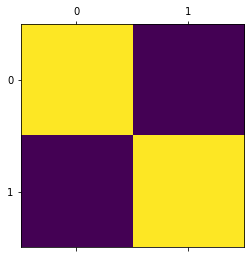

In [204]:
plt.matshow(bignine.corr())

Text(0, 0.5, 'SP_DYN_CBRT_IN')

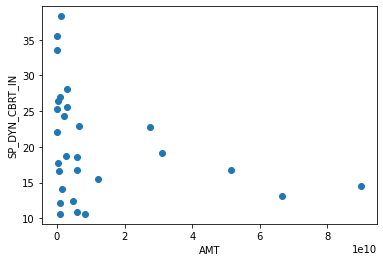

In [45]:
plt.scatter(bignine['AMT'],bignine['SP_DYN_CBRT_IN'])
plt.xlabel('AMT')
plt.ylabel('SP_DYN_CBRT_IN')

Finalizamos el contexto Spark

In [5]:
sc.stop()